<img src="./images/anchormen-logo.svg" width="500">

#  BASICS: Data Exploration and Visualization using Python  


# Data Exploration and Visualization

In this lab session we will explain different methods and tools to visualize your data. After we have described most of the basic visualization options the last section of this notebook will demonstrate a step by step approach of how data can be explored. 

## Goals

After this lab, you will have learned:

- A standard stack of Python libraries for Visualization purposes
- Know how a figure is built with `matplotlib`
- How to plot basic plots like histogram and scatterplot with pandas 
- How a basic dataset can be explored through visualizations 

# Introduction

The ability to visualize data is a fundamental competency of a data scientist. There are two main purposes for data visualization: 

- To **explore** data: for example to identify outliers or to identify if data transformation is needed.
- To **communicate** data: for example to business stakeholders. 

There are a lot of tools available to visualizing data. In this lab session we will explore the following tools for Python: 

- the `plot` methods in Pandas
- the `matplotlib` library 
- `seaborn` library, which is built on top of `matplotlib` to easily produce pretty and more complex visualizations 

We will first explore the plot function in pandas. We then continue with the `matplotlib.pyplot` module in which `pyplot` maintains an internal state in which you build up a visualization step by step. Last we will use the Titanic dataset for some EDA (Explorative Data Analysis). 

As this notebook will mainly use examples to show the use of visualization methods, we highly encourage you to play around with the argument values to explore each functionality and learn interactively. 

Let's get started!

---

### Before we start: imports and settings

Things to note in the code block below:
* `%matplotlib inline` is 'magic' Jupyter syntax that tells Jupyter to render plots inline, directly in the notebook.
* The rest of the code is the packages we will use, imported with their customary abbreviations.

In [2]:
%matplotlib inline

import numpy as np               # To generate example data
import pandas as pd              # Data frames, and some simple plotting methods
import seaborn as sns            # High-level plotting
import matplotlib.pyplot as plt  # Low-level plotting

### Before we start: matplotlib, 'figures' and 'axes'

Nearly all Python plotting libraries that produce PNGs are based on Matplotlib. They generally hide their underlying Matplotlib implementation pretty well, but there are two Matplotlib concepts you encounter in nearly every library: the **Figure** class and the **Axes** class.

A `Figure` object is a top-level Matplotlib object that contains whatever illustration you are making. It is the thing you save, or print, or display in a window or notebook.

An `Axes` object, generally speaking, is one of the subplots within the figure (possibly the only plot); it is the thing to which you add graphical primitives like lines, or dots, or rectangles.

Some plotting functions return `Axes` objects; these generally have an `ax=...` argument to which you can pass your own `axes` that the function should draw on. Other functions, generally the ones that create composite plots, return entire `Figure` objects.

# 1. Pandas plotting 

Pandas has several plotting methods; all are a thin wrapper around matplotlib's [`pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). Their usefulness is limited: colours must be crafted and specified manually (you can't just say 'colour according to this categorical variable'); and they tend to rely on the DataFrame's `index` as `x` axis, where an explicitly-specified variable for the `x` axis would make more sense.

The default pandas plot method is a line plot. To plot other plot styles you usually have to pass the `kind` argument. We will show the most basic methods and parameter settings by a series of examples.

Studies have shown that as programmers become more experienced and productive, the difference between an experienced and relatively unexperienced programmer pertains to a small extent due to what they know by heart. To a larger extent, the difference is that experienced programmers refer to the documentation more often, and more quickly find what they need. Hence the twin goals of this section:

* To get you to type and run the code yourself a few times, to give you *Fingerspitzengefühl*
* To get you to read through the [pandas plot documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) to know what is possible.

So, here are the main pandas plots:

* **line plot:** `my_df.plot()`  
  This automatically plots every variable in the data frame, each line in its own colour, and uses the row index for the x-coordinates.

* **scatterplot:** `my_df.plot.scatter(x='my_x_column', y='my_y_column')`
      
* **scatterplot** with points coloured by value/category:  
`my_df.plot.scatter(x='my_x_column', y='my_y_column', c='my_rgb_column')`     
  It is up to you to create the rgb column from the variable you want to map to colour.
  
* **bar plot**, green, partly transparent: `my_df.plot(kind='bar', color='g', alpha=0.7)`
* **histogram**, counts normalized to sum to 1: `my_df.hist(bins=20, alpha=0.3, color='g', normed=True)`
* **kernel density estimate**, styled as a blue dashed line: `my_df.plot(kind='kde', style='b--')`

### Pandas line plots

By default the plot method will try to plot a line plot. When a line plot is made from a DataFrame each line represents the data from a different column. 

In [3]:
m = np.random.randn(20,5) # this generates a 20 by 5 matrix with random numbers
print(m)

[[-0.67844842 -1.16925852 -1.89197526 -0.01528397 -0.01421788]
 [ 0.78696556  0.07837774  0.4237623  -0.83012544  0.34116431]
 [ 0.28233008  0.89635502  0.60879804 -0.49469359  0.58714327]
 [ 1.49268401 -0.01294771 -0.27805812 -0.86242267 -0.74378011]
 [-0.9304254   0.7480909   0.0555377  -1.46445703  0.68783502]
 [-1.39340994  0.13737826 -0.22895356 -0.14544778 -0.04845391]
 [-0.26599516  1.20617522  1.33519677  0.11526933 -1.23003441]
 [-0.0102713   1.02597112 -0.65188099 -2.27162377 -0.01762341]
 [-0.51426479 -0.45536516 -0.6811531  -1.29462924 -1.11646929]
 [-1.41453455  0.74820288 -0.33380829 -2.37906211 -0.55370651]
 [-1.64335092  0.93400516 -0.17670658  0.25334574  0.9309638 ]
 [-0.83664286 -0.21125609  1.98357594 -0.43497885 -0.04200459]
 [-1.66748992 -0.24374798  0.63562202 -0.64651945 -1.15795588]
 [-0.15858238  1.23919881  0.41072786  0.38924616 -1.66860646]
 [-0.69102124  2.17420129  1.21096977 -0.97074374 -2.1494857 ]
 [-1.86535494  0.54117957  1.63802513  0.42119531  0.63

In [4]:
a = np.array([[1,2,3], [4,5,6]])
print(a.cumsum(0)) # cumsum can be used over columns
print(a.cumsum(1)) # or over rows

[[1 2 3]
 [5 7 9]]
[[ 1  3  6]
 [ 4  9 15]]


In [5]:
help(np.cumsum) # we can check what cumsum does if we don't know

Help on function cumsum in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See `ufuncs-output-type` for
    

So, let's make a lineplot. In this case, it doesnt really make sense, but it is just an illustration of what you can do.

<AxesSubplot:>

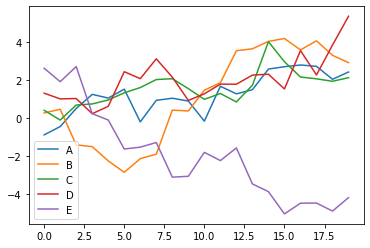

In [6]:
import pandas as pd
df = pd.DataFrame(np.random.randn(20, 5).cumsum(0),
               columns=['A', 'B', 'C', 'D', 'E'])
df.plot()

The `.plot()` method exists on both Series and DataFrames. Here we show examples of both. Note also how we create our own matplotlib Figure with two Axes subplots, and manually draw each plot on its own Axes.

In [7]:
# this creates some random data
s = pd.Series(np.random.randn(20).cumsum())
df = pd.DataFrame(np.random.randn(20, 5).cumsum(0),
               columns=['A', 'B', 'C', 'D', 'E'])

Now, let's assume we want to plot both of these things in a single figure. We can use subplots for this.

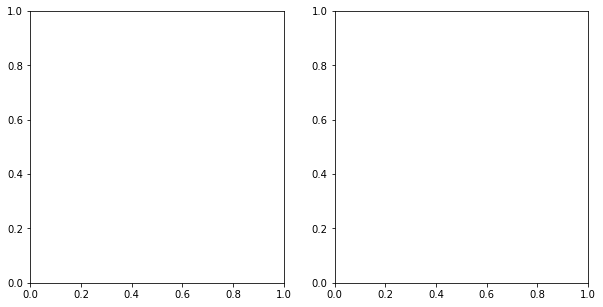

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # this creates an empty canvas

In [9]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

We can see we have an array of two axes. We can plot on every axes. Often, plotting functions offer an `ax` argument, as is the case with pandas.

In [10]:
s.plot(ax=axes[0], color='r') # here we fill the two empty canvas
df.plot(ax=axes[1])

<AxesSubplot:>

now, the fig is where the two axes are stored. So we can just view that:

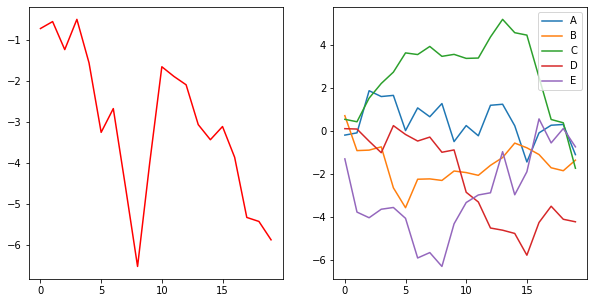

In [11]:
fig

This is a function I often use, if I want to explore the impact of parameters on a function. I will show how to use axes in loops in the next section on Matplotlib.

### Bar plots in pandas 

When we plot a barplot on a DataFrame, it will plot the value(s) of each row as one (or several) bars. The index provides the X-position for `'bar'`; or it will provide the Y-position in the case of `'barh'`.

<AxesSubplot:>

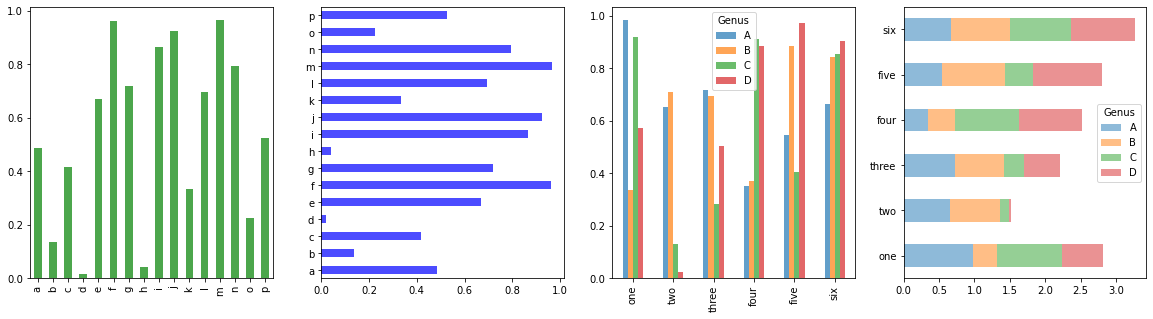

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) # we create a 1 by 4 grid of plots

letter_series = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop')) # generate some fake data

genus_df = pd.DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

letter_series.plot(kind='bar', ax=axes[0], color='g', alpha=0.7)
letter_series.plot(kind='barh', ax=axes[1], color='b', alpha=0.7)
genus_df.plot(kind='bar', ax=axes[2], alpha=0.7)
genus_df.plot(kind='barh', ax=axes[3], stacked=True, alpha=0.5)

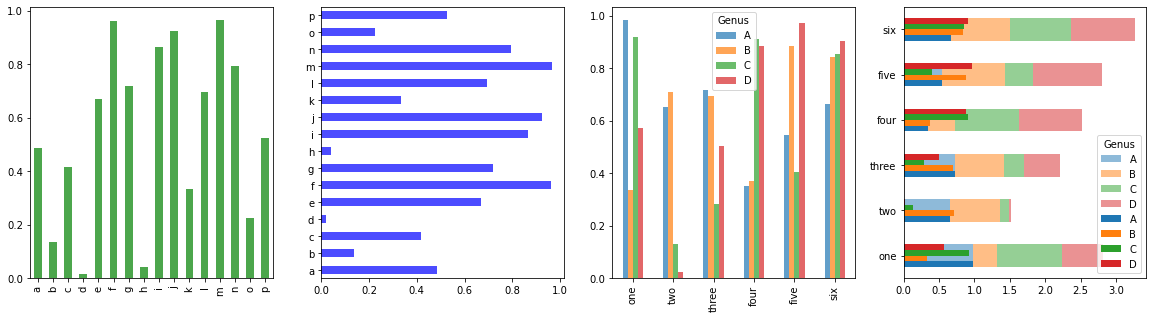

In [13]:
# you could try to overwrite one axes with a new one
genus_df.plot(kind='barh', ax=axes[3], stacked=False, alpha=1)
# but things get messy fast
fig

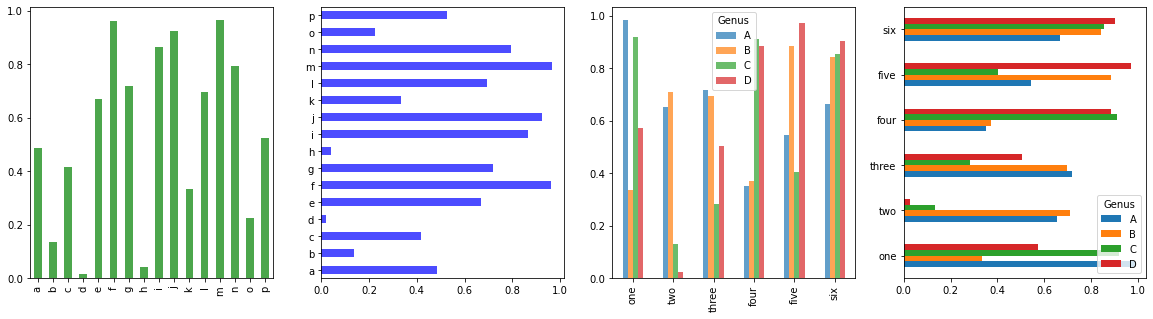

In [14]:
axes[3].cla() # if that's what we want, we have to clean an axes first
genus_df.plot(kind='barh', ax=axes[3], stacked=False, alpha=1) # and then plot a new image
fig

### Histograms, Density and Scatter Plots in pandas

<AxesSubplot:xlabel='a', ylabel='b'>

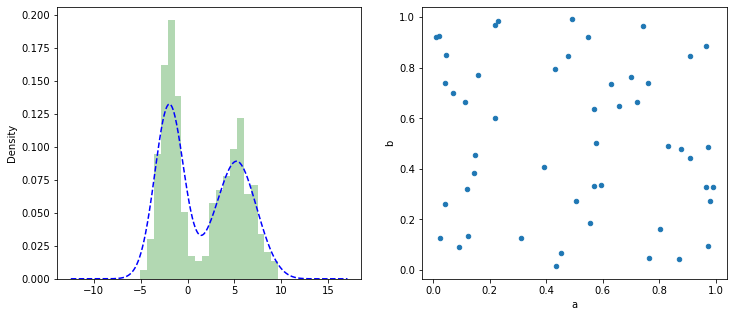

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,5)) # generate a 1 by 2 array with axes

# generate two normal distributions
bimodal_series = pd.Series(np.concatenate([
    np.random.normal(loc=-2, scale=1, size=200),
    np.random.normal(loc=5, scale=2, size=200)
]))
# and some random points
df_points = pd.DataFrame(np.random.rand(50, 2), columns=['a', 'b'])

# plot a histogram and a kde on the same axes
bimodal_series.hist(bins=20, alpha=0.3, color='g', density=True, ax=axes[0])
bimodal_series.plot(kind='kde', style='b--', ax=axes[0])

# and a scatterplot on the other axes
df_points.plot(kind='scatter', x='a', y='b', ax=axes[1])

### Scatter Matrix Plot

Using the Scatterplot Matrix platform, you can assess the relationships between multiple variables simultaneously.

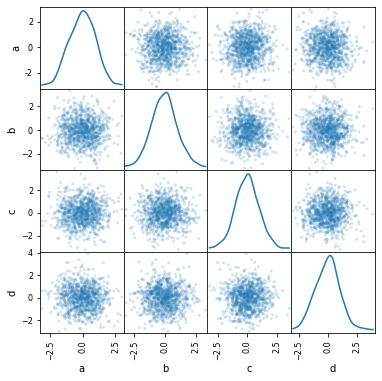

In [16]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

However, you should be very careful to use these matrices, because they don't scale very well.
The amount of plots grows quadratic. This is often denotes with what is called a "Big O" notation: $O(n^2)$. With 5 variables, this is workable. 10 could get you into very long waiting times, and 100 will often crash your notebook...

# 2. Working with `matplotlib`

## Figures and Subplots


To plot the plots in iPython Notebook we use the command: `%matplotlib inline`. The `matplotlib.pyplot` module is typically imported with the code: 

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's create a figure with 4 subplots. 

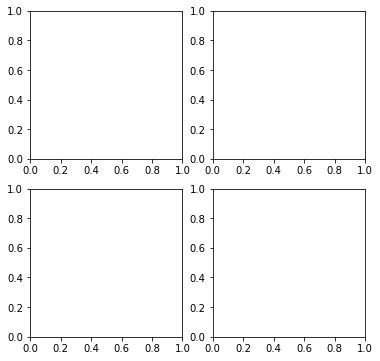

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(6,6))

In [19]:
# note how the axes are a matrix instead of an array! You will need two coordinates now...
axes.shape

(2, 2)

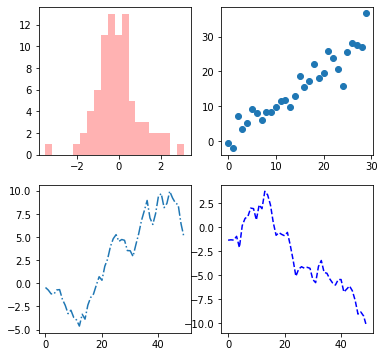

In [20]:
from numpy.random import randn
import numpy as np

axes[0, 0].hist(randn(80), bins=20, color='r', alpha=0.3)
axes[0, 1].scatter(np.arange(30), np.arange(30) + 3*randn(30))
axes[1, 0].plot(randn(50).cumsum(), '-.')
axes[1, 1].plot(randn(50).cumsum(), 'b--')

fig

Often, it is easy to wrap certain combinations into a single function.

In [21]:
import scipy.stats as stats
norm = stats.norm
observations = norm.rvs(loc=0, scale=1, size=1000)

In [22]:
def plot_distributions(observations, figsize=(15,5), bins=50):
    fig, axs = plt.subplots(1, 3, figsize=figsize)
    x = [*range(len(observations))] # we have to create an x-axis for the barplot

    # these are three different ways to visualize a set of observations
    axs[0].bar(x, observations)
    axs[1].boxplot(observations)
    axs[2].hist(observations, bins=bins);

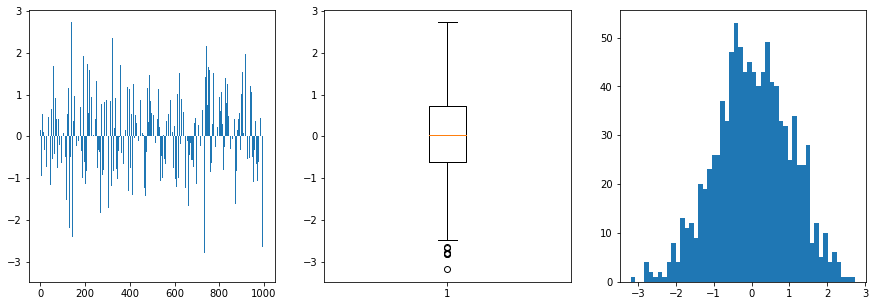

In [23]:
plot_distributions(observations)

This way, we can focus on our goal (to explore observations) instead of copy-pasting the same code over and over again.

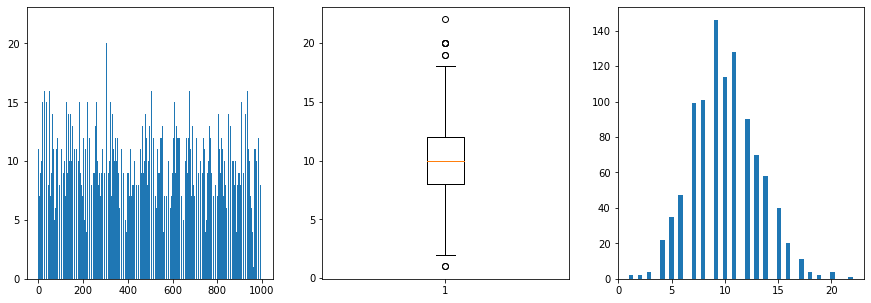

In [24]:
poi = stats.poisson # we take a poisson distribution
observations = poi.rvs(mu = 10, size = 1000) # and generate 100 random numbers from that distribution.
plot_distributions(observations)

Excercise: expand the `plot_distributions` function with a `title` argument, eg `plot_distributions(title='poisson distribution')` should add this title to the plot. Search the [matplotlib documentation](https://matplotlib.org/stable/index.html) to find out how to do this.

In [25]:
# your code here

In the example above we can see that we can set different plot types, in this lab we will show the most commonly used types of plots. If you want to see all the types of plots we suggest to go to the documentation.

## Style settings 

As we already saw in the example, for each plot we can specify parameters common for that specific plot type and different style settings. Some possible settings: 

- `color:` "blue" 
- `linewidth:` 1.0 
- `linestyle:` "-", '-.', '--', 'solid'
- `bins:` 20 
- `alpha:` 0.5, (measure of transparency)

For some parameters it's possible to only specify the value without the name of the parameter (as seen with the `linestyle` parameter). Furthermore it's also possible to set two style settings in one parameter. In the previous example we used a `'b--'` parameter, which specifies to plot a blue dashed line. The alpha-setting specifies the measure of translucent.

To see the full set of linestyles and markers you can look at the docstring --> help(plt.plot)

---

To highlight the actual data points on a line plot we can use markers. The marker can be part of the style string, which should follow the order of: color, marker type and line style: 

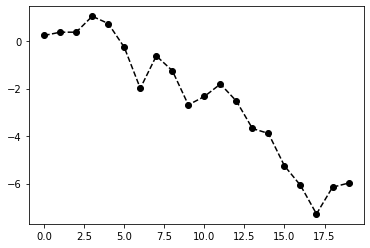

In [26]:
plt.plot(randn(20).cumsum(), 'ko--')

Take a look at the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) under `Notes - format strings` for more information on how to construct a style string.

When you want to compare data on the same scale you can use the parameters: `sharex` and `sharey` to specify that the x-axes and/or y-axes of the subplots should be the same.

If you want to get rid of the spacing between plots, set `wspace` and `hspace` to zero (or change it to larger numbers to increase the spacing):

    # use this in the same cell as where you instantiate the figure.
    plt.subplots_adjust(wspace=0, hspace=0, sharex=True)

You can also use `plt.thight_layout()`. This adjusts the padding between the figure edge and the edges of subplots, as a fraction of the font size.
    



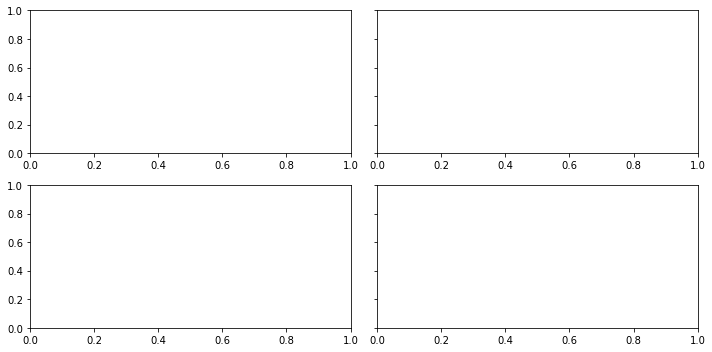

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10,5), sharey=True)
plt.tight_layout()

## Ticks, Labels and Legends

We can control the range of the plot, tick locations and tick labels by calling the following methods on our axes objects: 

- `set_xticks`: set the ticks on the x-axis
- `set_xtick_labels`: set custom tick labels 
- `xlim`: set the range of the x-axis. When run with no arguments, return the current parameter settings.
- `set_xlabel`: give a name for the X axis 
- `set_title`: give a titel for the subplot

The easiest way to add a legend to a subplot is to pass the `label` argument. With the `loc` argument the location of the legend can be specified. Below an example: 

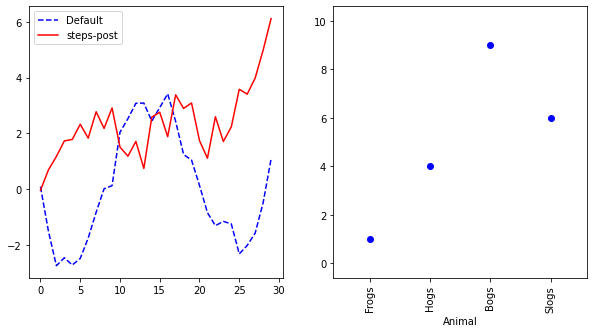

In [28]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']
data = randn(30).cumsum()
data1 = randn(30).cumsum()

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

axes[0].plot(data, 'b--', label='Default')
axes[0].plot(data1, 'r-', label='steps-post')
axes[0].legend(loc='best')

axes[1].plot(x, y, 'bo')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation='vertical')
axes[1].set_xlabel('Animal')
axes[1].margins(0.2)

## Customized plot annotations

It's also possible to draw your own plot annotations in the form of text or a specified shape. See the example below: 

(-2.0, 2.0)

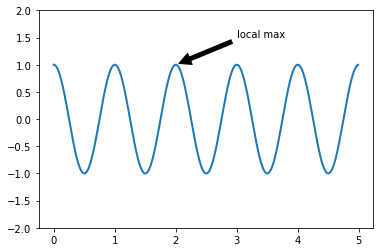

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', 
            xy=(2, 1), # location of the arrowpoint
            xytext=(3, 1.5), # location of the text
            arrowprops=dict(facecolor='black', 
            shrink=0.05),
            )

ax.set_ylim(-2,2)

Excercise: search the `annotate` documentation in Search the [matplotlib documentation](https://matplotlib.org/stable/index.html) and find out how to add the `arrowstyle` argument to the `arrowprops`.

## Saving plots to file 

You can save the active figure to a file with `plt.savefig`, to save the above fig as a pdf use the code: 

> `fig.savefig('fig_name.pdf')`

Other useful arguments are `dpi` to specify the dots-per-inch resolution and `bbox_inches` to adjust the whitespace around the actual figure. 

# 3. Data visualisation with Seaborn

## Introduction

> "The simple graph has brought more information to the data analyst’s mind 
> than any other device." --- John Tukey

We now turn to visualising your data using seaborn. This is how Seaborn [introduces itself](http://seaborn.pydata.org):

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

For the most part, Seaborn hides its Matplotlib implementation pretty well. But there are two Matplotlib concepts that you will encounter when using Seaborn, which you've learnt about above: `figures` and `axes`.

Some Seaborn plotting functions return Axes objects; these generally also have an `ax=...` argument to which you can pass your own `axes` for Seaborn to draw on. Other functions, generally the ones that create composite plots, return entire Figures.

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## First steps

Let's use our first graph to answer a question: Do cars with big engines use more fuel than cars with small engines? You probably already have an answer, but try to make your answer precise. What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?

### The `mpg` data frame

You can test your answer with the `mpg` (miles per gallon) __data frame__ provided as a csv file in this directory. A data frame is a rectangular collection of variables (in the columns) and observations (in the rows). `mpg` contains observations collected by the US Environment Protection Agency on 38 models of cars.

In [31]:
mpg = pd.read_csv('./data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Among the variables in `mpg` are:

* `displ`, a car's engine size, in litres.
* `hwy`, a car's fuel efficiency on the highway, in miles per gallon (mpg). 
  A car with a low fuel efficiency consumes more fuel than a car with a high 
  fuel efficiency when they travel the same distance. 
* `manufacturer`: Manufacturer/brand name
* `model`: Car model name
* `year`: Year of manufacture
* `cyl`: Number of cylinders
* `trans`: Type of transmission
* `drv`: f = front-wheel drive, r = rear wheel drive, 4 = 4wd
* `cty`: City miles per gallon
* `fl`: Fuel type. e = ethanol, d = diesel, r = regular, p = premium, c = natural gas
* `class`: The 'type' of car


You can find out more about `mpg` [here](https://www.rdocumentation.org/packages/ggplot2/versions/2.2.1/topics/mpg).

### Creating a Seaborn plot

To plot `mpg`, run this code to put `disp` on the x-axis and `hwy` on the y-axis:

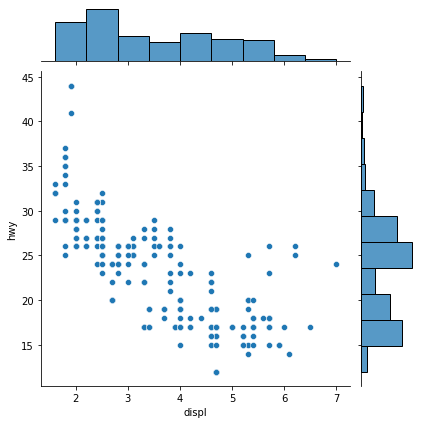

In [32]:
sns.jointplot(x=mpg['displ'], y=mpg['hwy'], kind='scatter')

The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`). In other words, cars with big engines use more fuel. Does this confirm or refute your hypothesis about fuel efficiency and engine size?

With Seaborn, you begin a plot by opening the [Seaborn API reference](http://seaborn.pydata.org/api.html) and choosing an appropriate plot type. The API reference is briefly described below, too.

## 1-D plots:

* [distplot](http://seaborn.pydata.org/generated/seaborn.distplot.html)
* [kdeplot](http://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [rugplot](http://seaborn.pydata.org/generated/seaborn.rugplot.html)

Plus a bunch of 2-D plots that also make sense in one dimension, such as the boxplot. See the next block.

## 2-D plots:

Scatterplots, potentially with a regression model added on top of it:

* [scatterplot](http://seaborn.pydata.org/generated/seaborn.scatterplot.html)
* [regplot](http://seaborn.pydata.org/generated/seaborn.regplot.html)
* [residplot](http://seaborn.pydata.org/generated/seaborn.residplot.html)

Plots of the ordinary joint distribution; can all be used on a single dimension, too.

* [kdeplot](http://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [boxplot](http://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [violinplot](http://seaborn.pydata.org/generated/seaborn.violinplot.html)
* [stripplot](http://seaborn.pydata.org/generated/seaborn.stripplot.html)
* [swarmplot](http://seaborn.pydata.org/generated/seaborn.swarmplot.html)
* [pointplot](http://seaborn.pydata.org/generated/seaborn.pointplot.html)
* [barplot](http://seaborn.pydata.org/generated/seaborn.barplot.html)
* [countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html)


## Data-to-aesthetic mapping: x, y, and hue

Practically all of the plots above accept three mappings:

* `x` (sometimes called `data` or `a`)
* `y` (sometimes called `data2`)
* `hue` (for the color).

That is about the limit of seaborn's customizability, but it is enough for the majority of cases.

Deciding on the best visualisation for your data is often an iterative proces:

1. Ask questions about the data
2. Try to answer the questions with a visualisation

Some visualisation don't work well, or raise new questions. I often use pen and paper in a discussion with co-workers before we start to visualize.

In practice, the visualisations that cover 80% of my needs as a data scientist are:
- boxplot
- histogram
- line and Scatterplots
- heatmaps

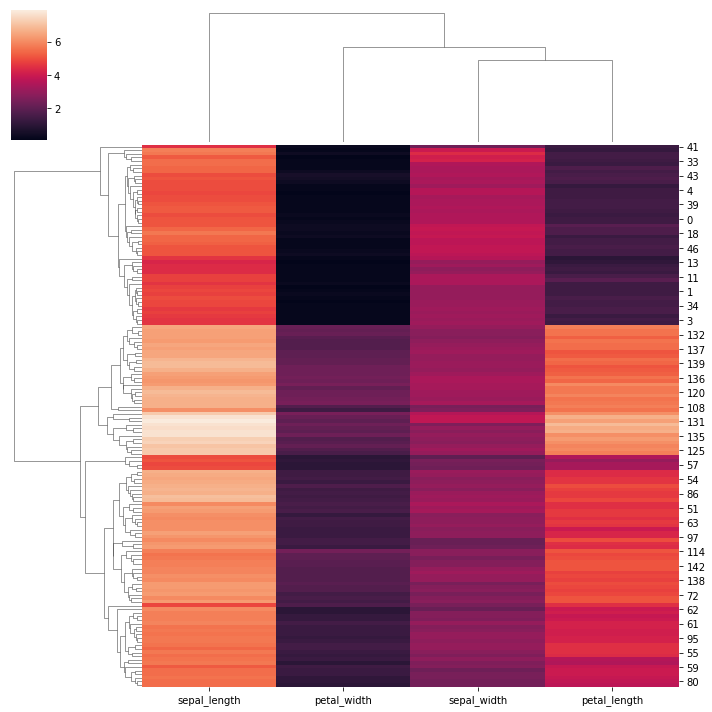

In [33]:
# heatmaps help to find clusters and patterns
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris) # a heatmap that addes hierarchical clustering

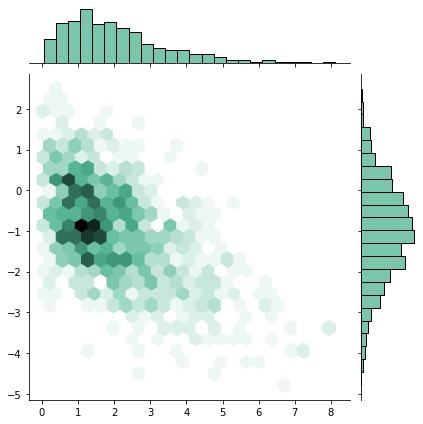

In [34]:
# the jointplot allows you to combine statistical measures. More on that below.
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

### Exercises mpg

1.  How many rows are in the `mpg` dataset? How many columns?
     
1.  Make a scatterplot of `hwy` vs `cyl`: highway fuel efficiency versus number of cylinders.

1.  What happens if you make a scatterplot of `class` vs `drv`? Why would such a scatterplot be useless?

1. How would you communicate the counts of each `class` and `drv` combination?


### Exercises mpg (2)

1.  What happens if you facet on a continuous variable?

1.  Make a FacetGrid of `drv` versus `cyl`. What do the empty plots mean?

1.  What do these two plots have in common?


In [35]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [36]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


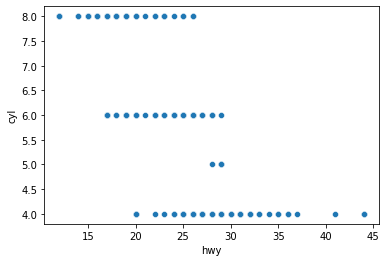

In [37]:
sns.scatterplot(x="hwy", y="cyl", data=mpg);

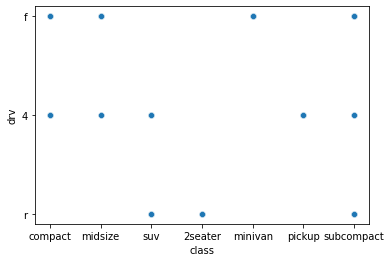

In [38]:
sns.scatterplot(x="class", y="drv", data=mpg);

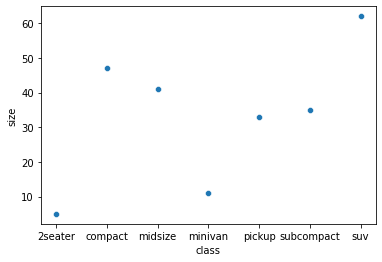

In [39]:
count=mpg.groupby(["class"]).size()
new_df = count.to_frame(name = 'size').reset_index()
sns.scatterplot(data=new_df, x="class",y="size");

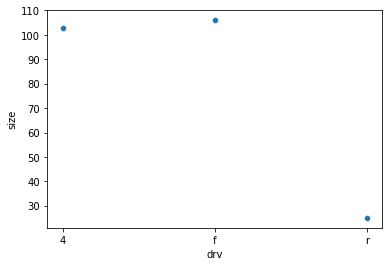

In [40]:
count=mpg.groupby(["drv"]).size()
new_df2 = count.to_frame(name = 'size').reset_index()
sns.scatterplot(data=new_df2, x="drv",y="size");

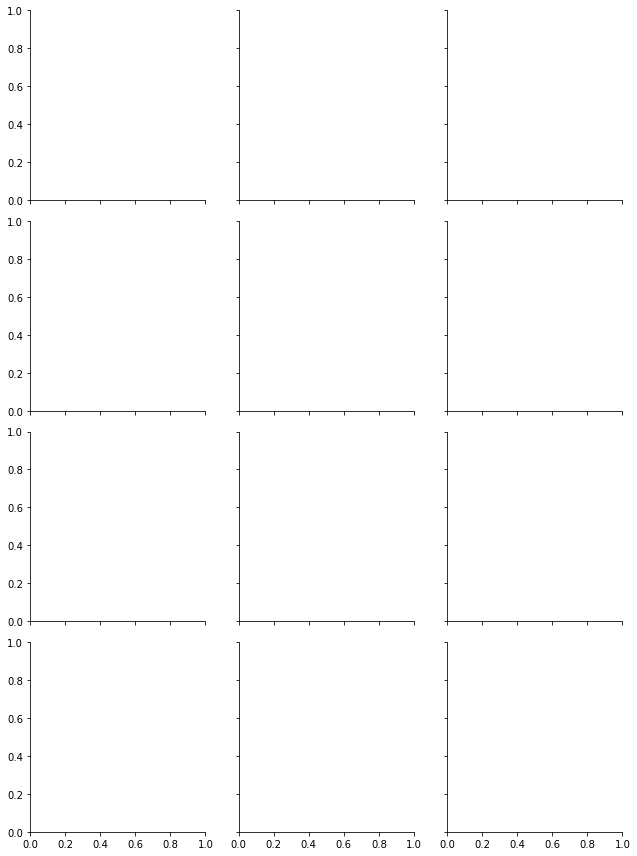

In [41]:
sns.FacetGrid(mpg, col="drv", row="cyl")

## PairGrid: make a grid of plots, every plot for a different variable pair

* [PairGrid](http://seaborn.pydata.org/generated/seaborn.PairGrid.html)
* [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html): the quick interface

The PairGrid lets you map *variables* + *plotting method* --> *plot*. You can do this for three parts of the grid:

* `map_diag`: variables on the diagonal
* `map_upper`: variable pairs above the diagonal
* (look this one up on the API page :-) ) variable pairs below the diagonal
* (look this one up on the API page :-) ) all off-diagonal entries together.

The plotting methods you pass into are Seaborn's (or matplotlib's!) axes-level plotting functions, that take one or two columns of data as input, and draw on an axes object.

### exercise: pairplot

Use `sns.pairplot` to draw a grid of all pairs of data in `mpg` showing regression plots on the off-diagonal entries, and kernel density estimates on the diagonal entries.

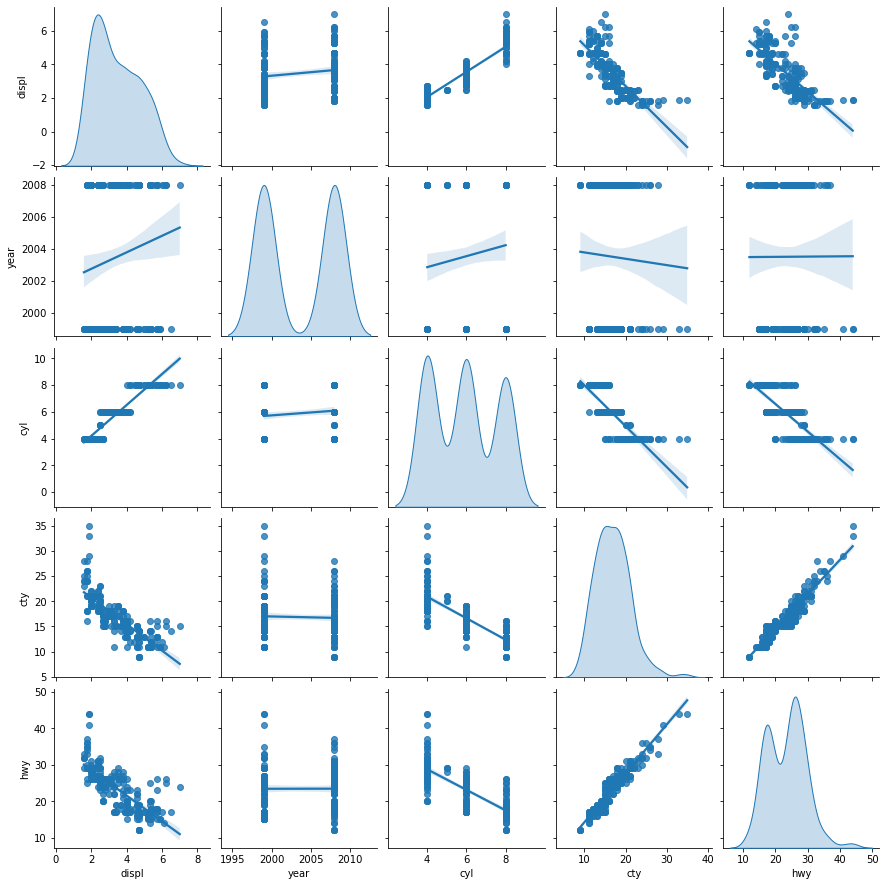

In [42]:
sns.pairplot(mpg, kind='reg', diag_kind='kde')

### exercise: PairGrid

Use `sns.PairGrid` to draw another grid, but this one should have `kdeplot`s on the diagonal entries, also `kdeplot`s on the entries below the diagonal, and scatterplots on the entries above the diagonal. Look up and read the API entry for PairGrid to find out how to do this.

How are categorical variables displayed when you do this?

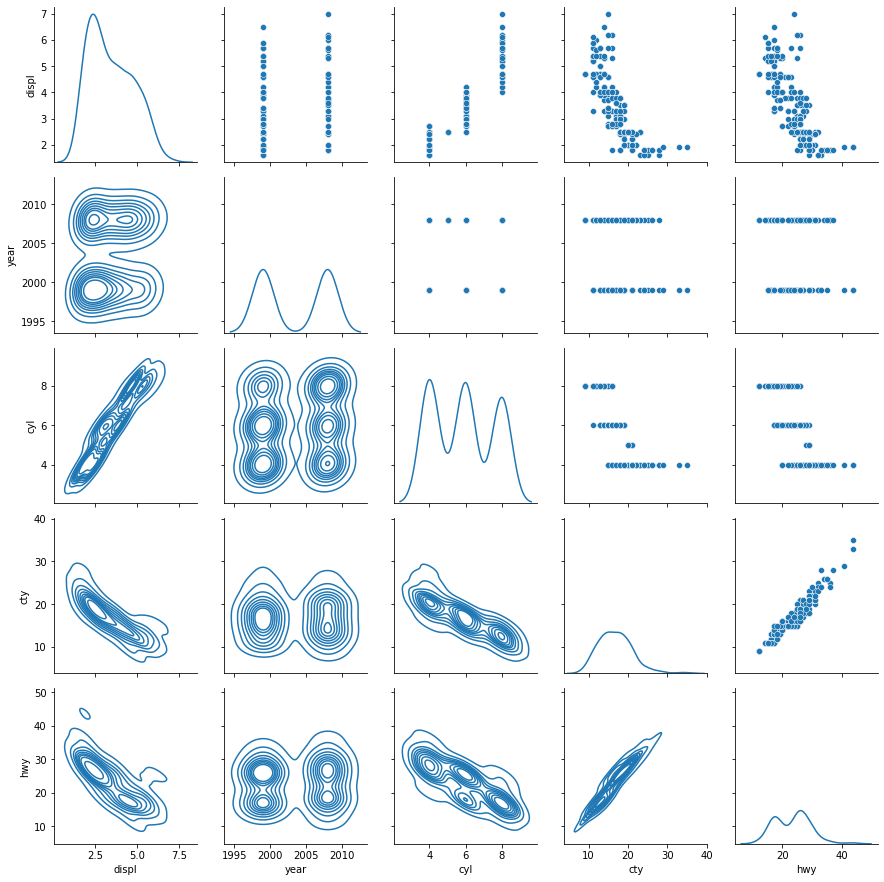

In [43]:
grid = sns.PairGrid(mpg)
grid.map_upper(sns.scatterplot)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.kdeplot)

## FacetGrid: make a grid of plots, every plot for a different pair of category values

* [FacetGrid](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
* [factorplot](http://seaborn.pydata.org/generated/seaborn.factorplot.html): the quick interface


Seaborn has one other high-level function that makes use of FacetGrid: `lmplot`.

* [lmplot = FacetGrid + regplot](http://seaborn.pydata.org/generated/seaborn.lmplot) = regplot + FacetGrid

### Exercise: recreating lmplot

Use FacetGrid and regplot to recreate the plot at the bottom of the [lmplot](http://seaborn.pydata.org/generated/seaborn.lmplot) reference page:

* Facet by sex vertically
* Facet by time of day horizontally
* Regress tip size onto bill size for each facet

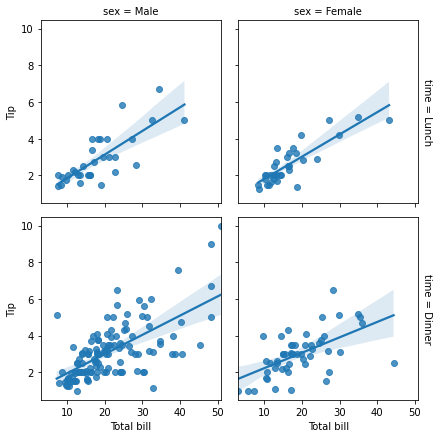

In [44]:
# Your code goes here

## import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True, despine=False)
g.map_dataframe(sns.regplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip")

for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == "Lunch" and col_val == "Female":
        sns.set()
    else:
        sns.set()


## JointPlot: plot two variables plus their marginal distributions

* [JointGrid](http://seaborn.pydata.org/generated/seaborn.JointGrid.html)
* [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html): the quick interface


### Exercise: jointplot

Make a joint plot of `hwy` vs `year`, with marginal rugplots.

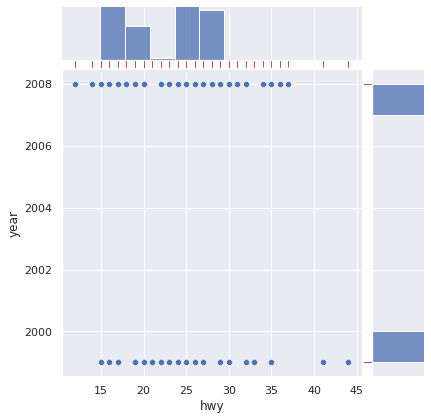

In [45]:
g=sns.jointplot(data=mpg, x="hwy", y="year")
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# 4. Data Exploration and Visualization with the Titanic Dataset

Now we will apply visualization methods to do some EDA (Explorative Data Analysis) on the Titanic Dataset. Based on the data in the Titanic dataset we will try to answer different questions that produce interesting insights. 

In this section we will also introduce the very useful `factorplot` method in seaborn. 

First let's do the main imports and look at the dataset:

In [46]:
import numpy as np
from numpy.random import randn
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# import and look at the dataset
df_titanic = pd.read_csv('./data/train_titanic.csv')
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# Which variables do we have and what are there data types?
# Your code here:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
# Which unique passenger classes (Pclass) do we have? 
# Your code here:
df_titanic.Pclass.unique()

array([3, 1, 2])

In [50]:
# How many observations for each passenger class do we have? 
# Your code here:
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

The information above reveals that the 'Age' column has missing values. Let's remove the rows that contain missing values for the 'Age' feature: 

In [102]:
# Remove rows for df_titanic that have no age, your code here:
df_titanic=df_titanic.dropna(subset=['Age'])
df_titanic.count()

index          714
PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
person         714
family_size    714
dtype: int64

With the `catplot` method of the Seaborn module we are able to build conditional plots. A conditional plot shows what the data looks like when segmented by one or more variables. 

### Gender distribution

To get insight into the amount of woman and men we can plot:

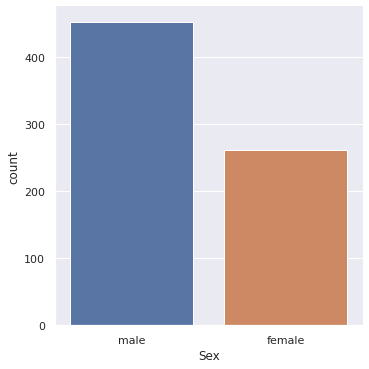

In [52]:
# Let's first check gender
sns.catplot(x='Sex', data=df_titanic, kind='count')

# Another way to get there: 
#df_titanic['Sex'].value_counts().plot(kind='bar')

### Gender by classes distribution

Now let's look at Gender and the Class someone was travelling in. So we want to seperate the gender for each class category. With a `catplot` this can be accomplished with the `hue` argument. 

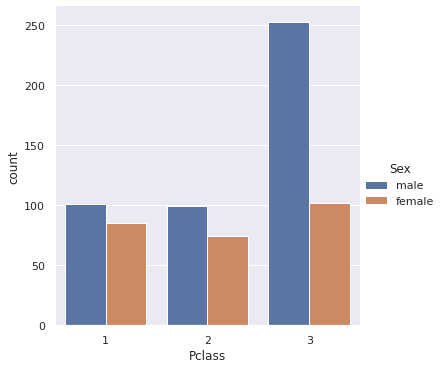

In [53]:
sns.catplot(x='Pclass', data=df_titanic, hue='Sex', kind='count')

# or we could have used: 
# result = df_titanic.groupby(by='Sex')['Pclass'].value_counts()
# result.plot(kind='bar')

### Separate Children

The Titanic had the "Women and children first policy". As this might influence the survival variable we want to create a feature which seperates children (not separating sexes), female and male. This means we need to create a new column with a categorical variable named 'person', everyone under 18 will get the label 'child'. Anyone above 18 will be separated based on their sex.

**Exercise: Create the new column as described above: **

In [54]:
# code
df_titanic['person'] = df_titanic['Sex'].where(df_titanic['Age'] > 17, 'child')

In [55]:
#Look at the dataset again
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


**Exercise: Now, plot `catplot` based on the 'person' and 'class' variable**

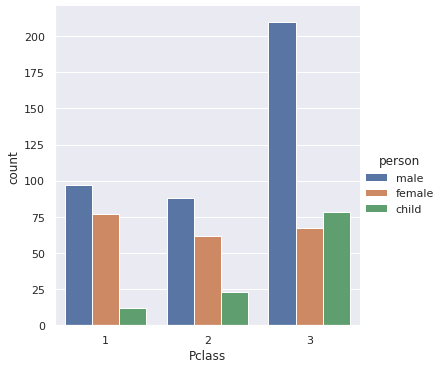

In [56]:
# code
sns.catplot(x='Pclass', hue='person', data=df_titanic, kind='count');

## FacetGrid 

To plot multiple kernal density plots on one plot, we can use the `FacetGrid` method of `seaborn`.  

Let's use a `FacetGrid` to condition on the person and age variable. 

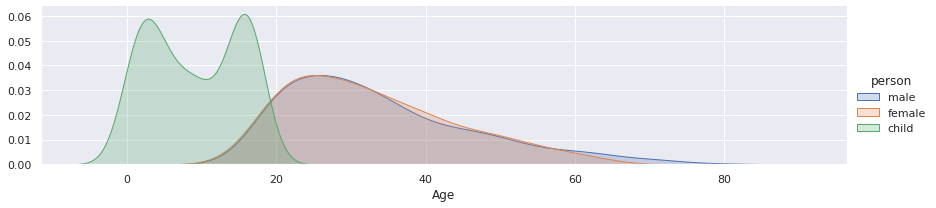

In [58]:
# code
g = sns.FacetGrid(df_titanic, hue='person', aspect=4)
g.map(sns.kdeplot, 'Age', shade=True)
g.add_legend();

The dataset contains data about the amount of family members onboard. The columnn 'SibSp' refers to the amount of siblings / spouses on board, the variable 'Parch' refers to parents / children on board of the Titanic. To see if family size on board had an influence on the survive variable we need to make a new column which refers to the family-size on board. 

**Exercise: Create a new column named 'family_size' that holds the amount of family members on board of the Titanic, don't forget to include the person itself.**

In [60]:
# first make sure you reset the index!
df_titanic.reset_index(inplace=True)

In [61]:
# code 
df_titanic['family_size']=df_titanic['SibSp']+df_titanic['Parch']+1

# look at dataset 
df_titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,family_size
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,2
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1


**Exercise: Look at the "Women and children first policy", by visualizing the 'person' variable against the chance of survival by using a `Factorplot`.**

/home/ningwei/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


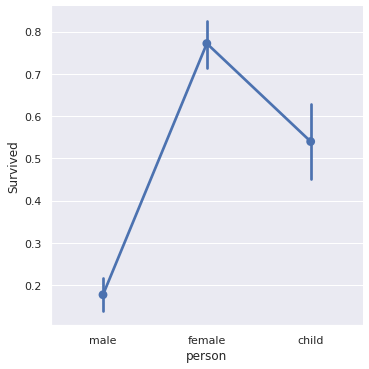

In [62]:
# code
sns.factorplot(x ='person', y ="Survived", data = df_titanic) 

**Exercise: Now look at the chance of survival by looking at both the class variable and the person, male, child variable.**

/home/ningwei/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


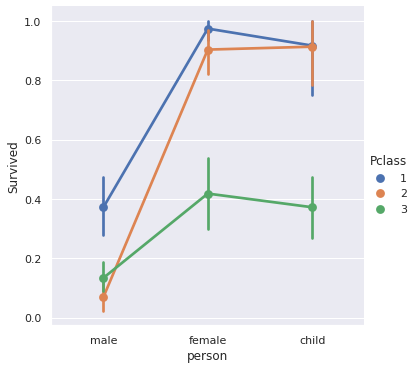

In [63]:
# code
sns.factorplot(x ='person', y ="Survived", data = df_titanic, hue="Pclass") 

/home/ningwei/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


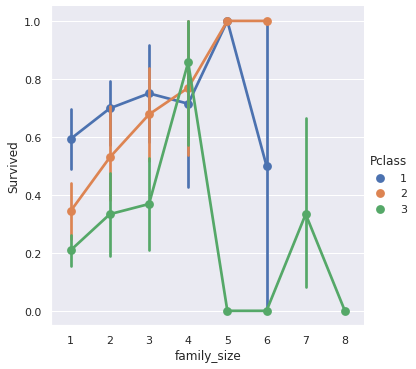

In [76]:
sns.factorplot(x ='family_size', y ="Survived", data = df_titanic, hue="Pclass") 

In [90]:
#df_titanic["family_size"].value_counts()
df_titanic.groupby(["family_size","Pclass","person"]).size()

family_size  Pclass  person
1            1       child       1
                     female     31
                     male       54
             2       child       4
                     female     28
                     male       61
             3       child      18
                     female     30
                     male      177
2            1       child       5
                     female     27
                     male       31
             2       child       3
                     female     16
                     male       15
             3       child      10
                     female     15
                     male       17
3            1       child       2
                     female     13
                     male        9
             2       child      12
                     female     10
                     male        9
             3       child      14
                     female     11
                     male       13
4            1       child 

**Exercise: Try to make a linear plot on age versus survival using the 'hue' parameter for class seperation.**

If you need more information on how to make a linear plot with pandas and seaborn look at this webpage: https://seaborn.pydata.org/tutorial/regression.html

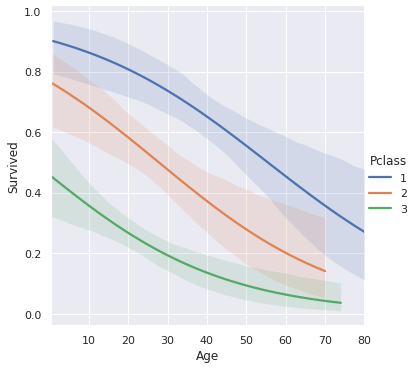

In [99]:
# code
#df_titanic
sns.lmplot(x="Age", y="Survived", hue="Pclass", data=df_titanic, logistic=True, scatter=False);

### Which plot should you use?

The Figure below gives some suggestings which type of plot/visualization you might want to use.  

---

<img src="./images/chart.png" width="800">

---

# 5. Summary & Resources

In this lab session we showed different visualization tools that can be used in Pyhton. For more details on each tool and the different possibilities we recommend to take a look at the documentation. This lab session focused mainly on data visualization for exploration. Upcoming labs will show additional examples of visualization which for example give insight in classification or parameter selection for machine learning algorithms.

###  Resources

- http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/
- http://pbpython.com/effective-matplotlib.html
- McKinney, Wes. Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. 
- https://www.kaggle.com/c/titanic
- cheatsheet matplot.lib: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf
- Overview lecture data visualization tools in Python: https://www.youtube.com/watch?v=OC-YdBz8Llw